# Toronto Distric Schools (TDSB) vs.Toronto Catholic Distric School Board (TCDSB) EQAO Ratings of Elementary Schools

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem, ttest_ind

## Significant in mean of TDSB compared to TCDSB

In [3]:
toronto_schools = pd.read_csv("output_data/toronto_schools.csv")
toronto_ratings = toronto_schools.iloc[:, -1]

catholic_schools = pd.read_csv("output_data/toronto_catholic_schools.csv")
catholic_ratings = catholic_schools.iloc[:, -1]

In [4]:
(t_stat, p) = ttest_ind(toronto_ratings, catholic_ratings, equal_var=False)

In [5]:
print("The mean rating of Toronto Catholic District School Board is {}.".format(catholic_ratings.mean()))
print("The mean rating of Toronto District School Board is {}.".format
      (toronto_ratings.values.mean()))

print("pvalue is {}.".format(p))
if p < 0.05:
    print("The difference in TDSB means is significant compared to TCDSB.")
else:
    print("The difference in TDSB means is not significant compared to TCDSB.")

The mean rating of Toronto Catholic District School Board is 6.034193548387095.
The mean rating of Toronto District School Board is 6.395719844357977.
pvalue is 0.023301881212982826.
The difference in TDSB means is significant compared to TCDSB.


In [6]:
tdsb_ratings = toronto_ratings
tdsb_means = np.mean(tdsb_ratings)
tdsb_sem = sem(tdsb_ratings)

tcdsb_ratings = catholic_ratings
tcdsb_means = np.mean(tcdsb_ratings)
tcdsb_sem = sem(tcdsb_ratings)

means = [tdsb_means, tcdsb_means]
sems = [tdsb_sem, tcdsb_sem]
labels = ["Toronto DSB", "Toronto Catholic DSB"]

<IPython.core.display.Javascript object>


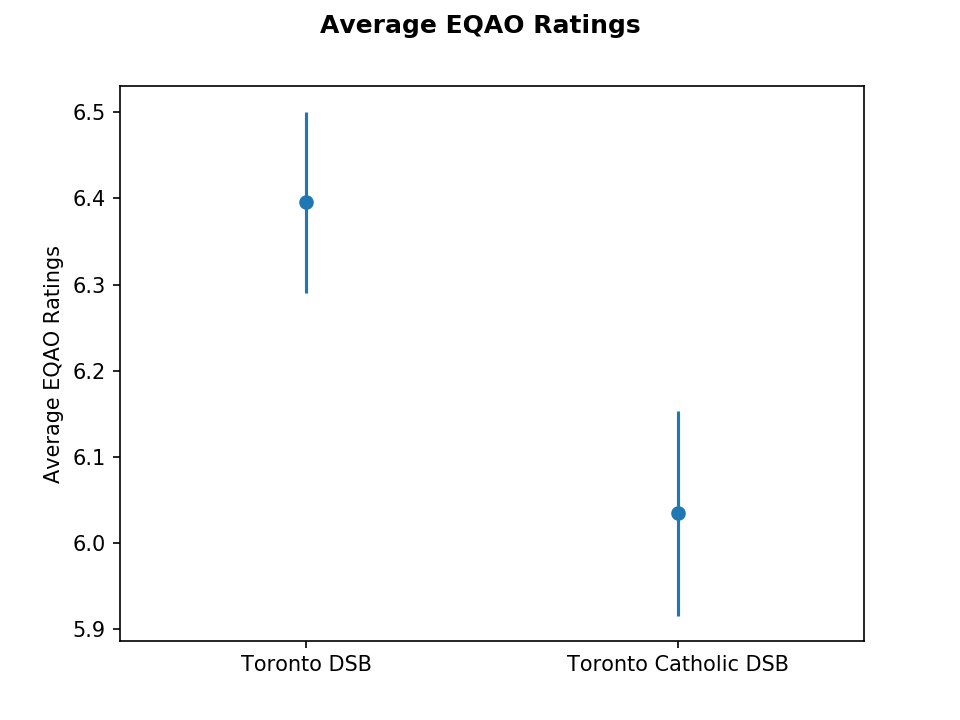

In [7]:
fig, ax = plt.subplots()

plt.suptitle("Average EQAO Ratings",
             fontsize=12, fontweight="bold")

ax.errorbar(np.arange(0, len(means)), means, yerr=sems, fmt="o")

ax.set_xlim(-0.5, 1.5)
ax.set_xticklabels(labels)
ax.set_xticks([0, 1])

ax.set_ylabel("Average EQAO Ratings")

# Save the figure
plt.savefig("output_data/Graphs/tdsb_vs_tcdsb_avg.png")

# Show plot
plt.show()

## Average of Each School Board by FSA

#### Average EQAO Ratings for Toronto District School Board By FSA

In [8]:
toronto_schools.head()

,SCHOOL NAME,ADDRESS,CITY,POSTAL CODE,FSA,RANKING (OUT OF 3046),RATINGS
0,Rolph Road,31 Rolph Rd,Toronto,M4G 3M5,M4G,284,8.0
1,Burrows Hall,151 Burrows Hall Boulevard,Agincourt,M1B 1M5,M1B,947,6.9
2,Chief Dan George,185 Generation Boulevard,Scarborough,M1B 2K5,M1B,2449,4.6
3,Lucy Maud Montgomery,95 Murison Boulevard,Scarborough,M1B 2L6,M1B,2529,4.4
4,Berner Trail,120 Berner Trail,Agincourt,M1B 1B3,M1B,1246,6.5


In [9]:
tbsd = toronto_schools[["FSA", "RATINGS"]]
tbsd.head()

,FSA,RATINGS
0,M4G,8.0
1,M1B,6.9
2,M1B,4.6
3,M1B,4.4
4,M1B,6.5


In [10]:
tbsd_fsa = tbsd.groupby(["FSA"]).mean().round(1)
tbsd_fsa.head()

,RATINGS
FSA,
M1B,6.3
M1C,7.4
M1E,4.6
M1G,6.1
M1H,7.5


#### Average EQAO Ratings for Toronto Catholic District School Board By FSA

In [11]:
catholic_schools.head()

,SCHOOL NAME,ADDRESS,CITY,POSTAL CODE,FSA,RANK (OUT OF 3046),RATINGS
0,St Barnabas,30 Washburn Way,Scarborough,M1B 1H3,M1B,1921,5.6
1,St Bede,521 Sewells Road,Scarborough,M1B 5H3,M1B,2100,5.3
2,St Columba,10 John Tabor Trail,Scarborough,M1B 1M9,M1B,2711,3.8
3,St Dominic Savio,50 Tideswell Blvd.,Scarborough,M1B 5X3,M1B,1470,6.2
4,St Florence,101 Murison Boulevard,Scarborough,M1B 2L6,M1B,1470,6.2


In [12]:
tcbsd = catholic_schools[["FSA", "RATINGS"]]
tcbsd.head()

,FSA,RATINGS
0,M1B,5.6
1,M1B,5.3
2,M1B,3.8
3,M1B,6.2
4,M1B,6.2


In [13]:
tcbsd_fsa = tcbsd.groupby(["FSA"]).mean().round(1)
tcbsd_fsa.head()

,RATINGS
FSA,
M1B,5.8
M1C,7.0
M1E,5.5
M1G,5.0
M1H,6.2


In [14]:
combined_fsa = pd.merge(tbsd_fsa, tcbsd_fsa, on="FSA", how="outer").reset_index()
combined_fsa.head()

,FSA,RATINGS_x,RATINGS_y
0,M1B,6.3,5.8
1,M1C,7.4,7.0
2,M1E,4.6,5.5
3,M1G,6.1,5.0
4,M1H,7.5,6.2


In [15]:
combined_fsa = combined_fsa.rename(columns={"RATINGS_x":"TDSB RATINGS", "RATINGS_y":"TCDSB RATINGS"})
combined_fsa.head()

,FSA,TDSB RATINGS,TCDSB RATINGS
0,M1B,6.3,5.8
1,M1C,7.4,7.0
2,M1E,4.6,5.5
3,M1G,6.1,5.0
4,M1H,7.5,6.2


<IPython.core.display.Javascript object>


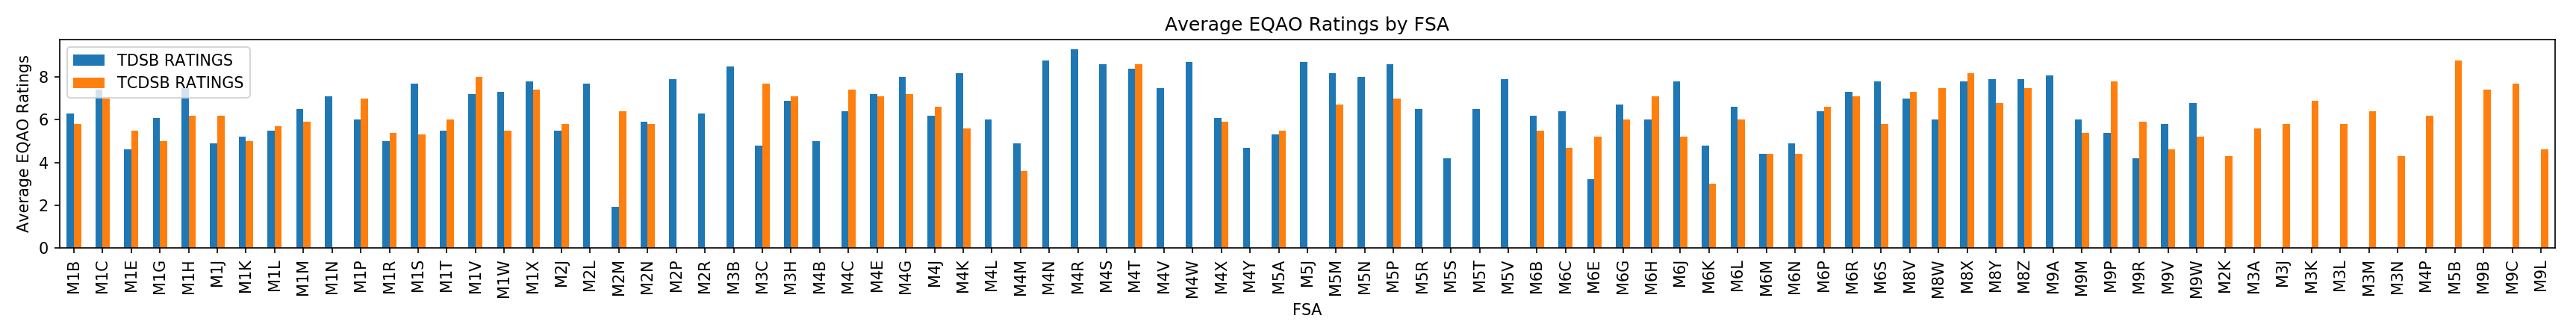

In [16]:
combined_fsa.plot(x="FSA", y=["TDSB RATINGS", "TCDSB RATINGS"], kind="bar", figsize=(23,3), align="center")

plt.xlabel("FSA")
plt.ylabel("Average EQAO Ratings")
plt.legend(loc="best")
plt.title("Average EQAO Ratings by FSA")
plt.tight_layout()

plt.savefig("output_data/Graphs/tdsb_vs_tcdsb_fsa.png")

plt.show()